In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
%matplotlib inline 

In [44]:
def factorial(n):
    p = 1
    for i in range(1, n+1):
        p *= i
    return p

In [45]:
class interpolation:
    def __init__(self, function, interval, n_points):
        # узлы сетки
        self.x = np.linspace(interval[0], interval[1], n_points)
        # значения в узлах сетки
        self.y = function(self.x)
        # число узлов сетки
        self.n_points = n_points

        # предрасчет знаменателей для каждой из точек
        self.denominators = [0] * n_points
        for i in range(n_points):
            p = 1
            for j in range(n_points):
                if i == j:
                    continue
                p *= self.x[i] - self.x[j]
            self.denominators[i] = p
        
        # для ленивой инициализации факториала от числа точек в случае,
        # если понадобится вычислять теоретическую погрешность
        self.factorial_n = None

    def __call__(self, x):
        """
            расчет значения интерполяционного многочлена
        """
        s = 0
        for i in range(self.n_points):
            p = 1

            for j in range(self.n_points):
                if j == i:
                    continue
                p *= x - self.x[j]

            s += self.y[i] * p / self.denominators[i]

        return s
    
    def theoretical_error(self, x, deriv):
        """
            вычисление оценки сверху погрешности интерполяции в точке x
        """
        p = 1
        for px in self.x:
            p *= x - px 

        # ленивый расчет фактораила и максимума (n+1)-й производной
        if self.factorial_n is None:
            self.factorial_n = factorial(self.n_points)
            self.max_nth_deriv = max(deriv(self.x))

        # n_points как раз n (степень многочлена) + 1
        return abs(self.max_nth_deriv * p / self.factorial_n)


4-th interpolation
actual error greater than theoretical one at 2.666666666666667:
actual error: 1.7763568394002505e-15
theoretical error: 0.0


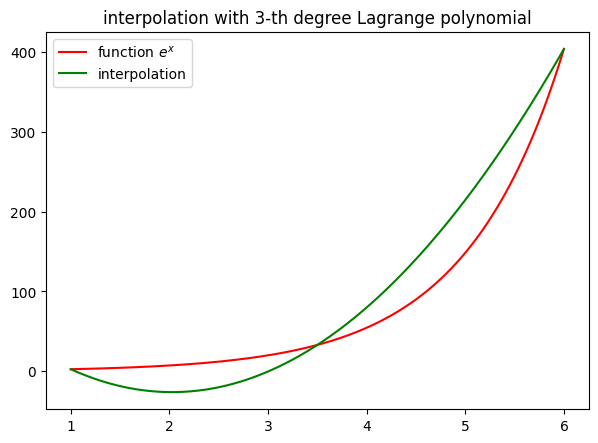

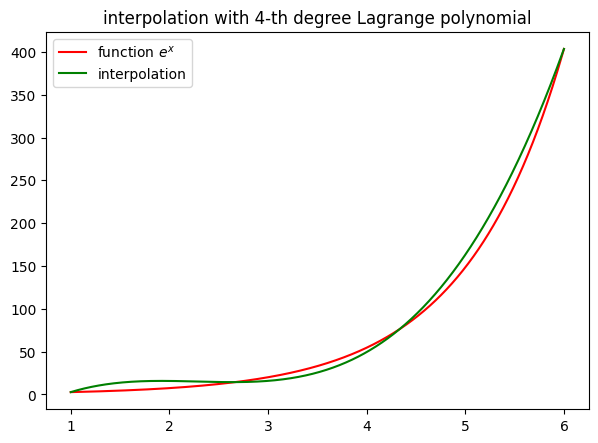

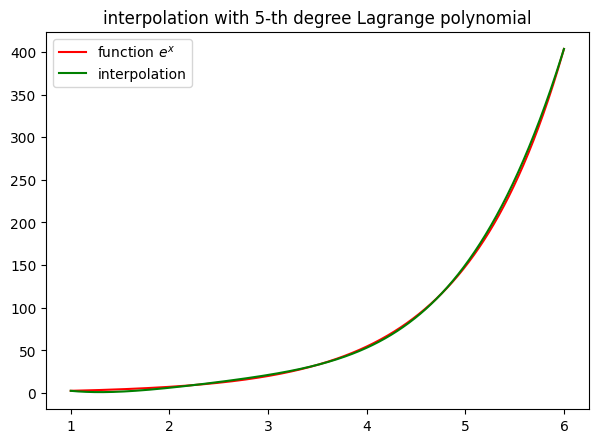

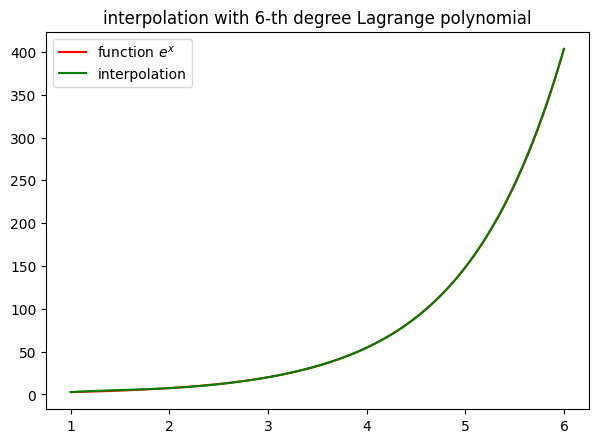

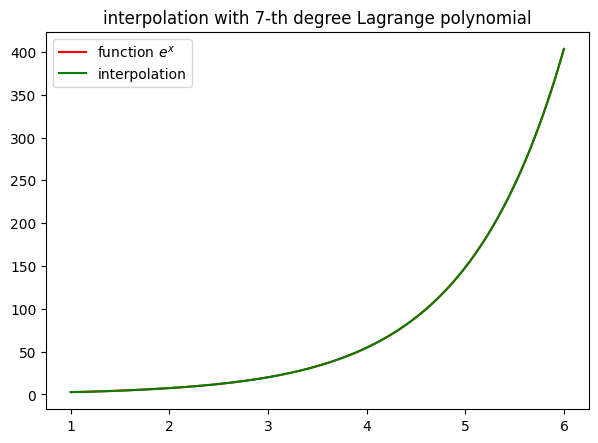

In [46]:
degrees = [3, 4, 5, 6, 7] # рассматриваемые степени интерполяционного многочлена
interval = (1, 6) # интервал интерполяции
function = np.exp # исходная функция (вариант 3)

for degree in degrees:
    interp = interpolation(function, interval, degree)

    # сетка для проверки погрешности и графика
    points_x = np.linspace(interval[0], interval[1], 1000)

    # значения исходной функции в узлах сетки
    points_y_reference = function(points_x)

    # значения интерполяционного многочлена в узлах сетки
    points_y_interpolation = [interp(p) for p in points_x]

    fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')

    plt.plot(points_x, points_y_reference, 'r', label='function $e^{x}$')
    plt.plot(points_x, points_y_interpolation, 'g', label='interpolation')
    plt.title(f'interpolation with {degree}-th degree Lagrange polynomial')
    plt.legend()

    for x, yr, yi in zip(points_x, points_y_reference, points_y_interpolation):
        actual_error = abs(yr - yi) # фактическая ошибка интерполяции
        theor_error = interp.theoretical_error(x, function) # теоретичкая ошибка интерполяции

        # тут ругнется разочек-другой, но это из-за неточности плавающей точки
        if actual_error > theor_error:
            print(f'{degree}-th interpolation')
            print(f'actual error greater than theoretical one at {x}:')
            print(f'actual error: {actual_error}')
            print(f'theoretical error: {theor_error}')
              